In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

In [3]:
def display_data(x,y):
    # get from raw file some physical properties along the LOS
    # creating the simple plot of HI_density Vs. distance 
        plt.plot(x,y)
        plt.xlabel("distance(cm)")
        plt.ylabel("HI_density(cm^-3)")
        plt.show()

In [4]:
def display_peak(x,y):
        # finding the peak in each of the graphs
        plt.plot(x,y)
        plt.xlabel("distance(cm)")
        plt.ylabel("HI_density(cm^-3)")    
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
        peak,properties = find_peaks(y)
        plt.plot(x[peak],y[peak],'bo')
        plt.show()


In [5]:
def display_all():
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        distance = distance * 0.1474 *3.086e24 /0.68
        ##scaling factor for chimp, this is in cm. is multiplied by the scale(listed on simulation data), the mpc, and h(hobble constant)
        display_data(distance,HI_density)
        display_peak(distance,HI_density)

In [6]:
#below shows the graph and the peaks
#display_all()

we have that the Lyman-limit systems is at $$1.6 X 10^{17} cm^{-2}	\lesssim N_{HI} \lesssim 10^{20} cm^{-2}$$
Now we are going to convert the units 

In [7]:
def area_under_peak():
    #declare the data that will store the peak location and the area and the lyman limited that are found
    column_names = ['HI_density','distance']
    area = pd.DataFrame(columns = column_names)
    #temp array for both peak location and density area
    location =[]
    density_area =[]
    lyman_limited_value = []
    lyman_limited_distance =[]
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        distance = distance *0.1474*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        prominences, left_bases, right_bases = peak_prominences(HI_density, peak)
        #calculating area under the curve by multiplying the peak value by half of its width, assuming is normally distributed
        #append to the lyman_limited series if conditions are satisfied
        for k,z,w in zip(peak,right_bases,left_bases):
            area_under_the_curve = np.multiply(HI_density[k], 1/2 * (distance[z] - distance[w]))
            if(area_under_the_curve >= (1.6*10**17) and area_under_the_curve  <= (10**20)):
                lyman_limited_value.append(area_under_the_curve)
                lyman_limited_distance.append([i,distance[k]])

        
        #original data
        density_area.append(HI_density[peak])
        location.append(distance[peak])
    print(prominences)
    print(left_bases)
    print(right_bases)
    area['HI_density'] = density_area
    area['distance'] = location
    return HI_density,peak,left_bases,right_bases,area,lyman_limited_value,lyman_limited_distance


In [8]:
HI_density,peak,left_bases,right_bases,area,lyman_limited_value,lyman_limited_distance = area_under_peak()


[3.469000e-09 4.620000e-09 1.761000e-09 ... 2.239349e-07 3.800000e-11
 9.450000e-10]
[    0     0    10 ...  9503 10677 10677]
[    4    53    15 ... 10677 10682 10686]


In [9]:
area

,HI_density,distance
0,"[1.253e-07, 1.68e-07, 2.192e-07, 3.606e-07, 9....","[2.5486457117647055e+21, 1.1666241788235294e+2..."
1,"[3.235e-09, 3.734e-09, 4.336e-09, 4.502e-09, 2...","[6.1428382076470575e+22, 9.22730156117647e+22,..."
2,"[6.837e-10, 1.225e-09, 2.112e-09, 2.028e-09, 1...","[3.506561895294117e+22, 8.491472090588234e+22,..."
3,"[9.219e-10, 2.26e-09, 2.813e-09, 2.088e-09, 1....","[7.304110899411764e+22, 3.1413229035294114e+23..."
4,"[9.623e-09, 9.671e-09, 9.959e-09, 1.15e-08, 1....","[2.05162635117647e+22, 3.5627525094117646e+22,..."
...,...,...
995,"[1.259e-09, 1.146e-09, 9.183e-10, 1.975e-09, 1...","[1.147893974117647e+22, 6.645209055294117e+22,..."
996,"[6.606e-10, 3.792e-10, 4.198e-10, 1.548e-09, 1...","[9.294195149411764e+22, 2.2813389331764706e+23..."
997,"[5.552e-09, 1.687e-09, 1.917e-09, 5.219e-09, 3...","[5.16084033235294e+22, 1.3063648846470586e+23,..."
998,"[5.181e-10, 5.764e-10, 5.592e-10, 5.09e-10, 4....","[3.1165722758823524e+22, 9.055385039411764e+22..."


In [10]:
peak

array([    3,     9,    14, ..., 10661, 10678, 10685], dtype=int64)

In [11]:
left_bases

array([    0,     0,    10, ...,  9503, 10677, 10677], dtype=int64)

In [12]:
right_bases

array([    4,    53,    15, ..., 10677, 10682, 10686], dtype=int64)

In [13]:
HI_density

array([2.282e-09, 2.879e-09, 4.925e-09, ..., 2.151e-09, 1.206e-09,
       2.686e-09])

In [14]:
 lyman_limited_value

[7.073408191965499e+18,
 3.570223745245216e+18,
 9.049623989669609e+17,
 7.155662681965082e+17,
 5.5576206276169754e+17,
 5.161769270234047e+17,
 1.606129804903489e+17,
 5.0298170450929824e+17,
 1.46489522812281e+18,
 1.9898621164615478e+17,
 4.476470356616143e+17,
 4.773243643758244e+17,
 8.753745755461494e+17,
 3.2875082981881414e+17,
 3.0064749987748563e+17,
 2.7063459579874573e+17,
 1.8857938387221747e+17,
 1.9608847599133548e+18,
 2.8127720748364464e+17,
 4.923389436516973e+17,
 6.269803214764034e+18,
 8.239085771997222e+18,
 1.294875852536438e+19,
 3.0138027281279336e+19,
 3.0247852923593103e+18,
 3.027261090953486e+17,
 2.0969548245726205e+17,
 4.878395369519899e+17,
 6.702948406489987e+18,
 8.222449009827933e+17,
 6.086602921991196e+17,
 5.854968340035301e+17,
 4.41521613534133e+17,
 1.638961255271467e+17,
 9.38631899232175e+17,
 1.708432818244031e+19,
 2.104619665902846e+19,
 6.291176077430591e+17,
 5.354863847157647e+17,
 2.401640860616084e+17,
 1.3825416038322693e+18,
 1.472

In [15]:
len(lyman_limited_value)

63064

In [16]:
np.log(lyman_limited_value[0])

43.40287410157305

In [17]:
lyman_limited_distance

[[0, 5.337439405294117e+22],
 [0, 8.571744396470586e+22],
 [0, 9.933028917058822e+22],
 [0, 1.086953915235294e+23],
 [0, 1.180604938764706e+23],
 [0, 1.2742559622941174e+23],
 [0, 1.5043030122352939e+23],
 [0, 1.0488399554664706e+25],
 [0, 1.0497737899582352e+25],
 [0, 1.051134405542941e+25],
 [0, 2.004666383299412e+25],
 [0, 2.005599548855294e+25],
 [0, 2.006960833375882e+25],
 [0, 2.013941179308235e+25],
 [0, 2.0148776895435296e+25],
 [0, 2.017175484299411e+25],
 [0, 2.0232226646758822e+25],
 [0, 2.9306984069323526e+25],
 [0, 3.8112795820388235e+25],
 [0, 4.356224184982353e+25],
 [0, 4.449711319220588e+25],
 [0, 4.451470620591176e+25],
 [0, 4.703514289151764e+25],
 [0, 4.70487490473647e+25],
 [0, 4.705811414971764e+25],
 [0, 4.706747925207058e+25],
 [0, 5.633723148434117e+25],
 [0, 6.240773765502941e+25],
 [0, 6.321753136612941e+25],
 [0, 6.507826348455881e+25],
 [0, 6.6531346076282345e+25],
 [0, 6.655007628098822e+25],
 [0, 7.162408873581176e+25],
 [0, 8.24915876337235e+25],
 [0, 9.

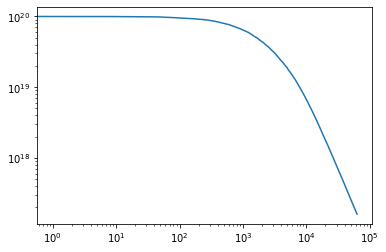

In [18]:
##the a-axis is the number of lyman-limited series, y-axis is the column density
lyman_limited_value_sorted = sorted(lyman_limited_value,reverse=True)
plt.loglog(lyman_limited_value_sorted)

We got the data now, now is the data processing

We bin the data by distance first:

In [19]:
lyman_limited_value_sorted

[9.994634589219011e+19,
 9.992254546789568e+19,
 9.989117871652558e+19,
 9.980001594717648e+19,
 9.979727234679113e+19,
 9.97793251181568e+19,
 9.971122700049093e+19,
 9.96671273255192e+19,
 9.95986277158814e+19,
 9.958527111325457e+19,
 9.953987641520615e+19,
 9.951641201747359e+19,
 9.946168742651234e+19,
 9.939145161720467e+19,
 9.93712240664198e+19,
 9.930286239805027e+19,
 9.925868266817677e+19,
 9.924378232207806e+19,
 9.924364505643501e+19,
 9.923253606499421e+19,
 9.916943316248083e+19,
 9.908069584761145e+19,
 9.905036993371682e+19,
 9.904350618999795e+19,
 9.898010178804856e+19,
 9.892860640813174e+19,
 9.891402354903687e+19,
 9.891164743861255e+19,
 9.89055973149182e+19,
 9.885833082389647e+19,
 9.883684828250264e+19,
 9.883024300223023e+19,
 9.882663129030341e+19,
 9.881597313488993e+19,
 9.87907807754331e+19,
 9.870182872545601e+19,
 9.86560137082352e+19,
 9.862993336984112e+19,
 9.853994427859978e+19,
 9.8525194533381e+19,
 9.852251547861875e+19,
 9.85185553179912e+19,
 9

In [20]:
##need to bin the data, and graph it like the paper.
##right here we are goin go bin the data, using panda
##find the max/min

min_value_lyman_limited_value = np.log10(min(lyman_limited_value_sorted))
max_value_lyman_limited_value = np.log10(max(lyman_limited_value_sorted))
print(min_value_lyman_limited_value)
print(max_value_lyman_limited_value)

17.20413329428564
19.99976692063655


In [21]:
##putting data into panda data_frame for better organization
##belows is the bin value
bins = np.linspace(min_value_lyman_limited_value,max_value_lyman_limited_value,301)
bins

array([17.20413329, 17.21345207, 17.22277085, 17.23208963, 17.24140841,
       17.25072719, 17.26004597, 17.26936475, 17.27868352, 17.2880023 ,
       17.29732108, 17.30663986, 17.31595864, 17.32527742, 17.3345962 ,
       17.34391498, 17.35323375, 17.36255253, 17.37187131, 17.38119009,
       17.39050887, 17.39982765, 17.40914643, 17.41846521, 17.42778398,
       17.43710276, 17.44642154, 17.45574032, 17.4650591 , 17.47437788,
       17.48369666, 17.49301544, 17.50233421, 17.51165299, 17.52097177,
       17.53029055, 17.53960933, 17.54892811, 17.55824689, 17.56756567,
       17.57688444, 17.58620322, 17.595522  , 17.60484078, 17.61415956,
       17.62347834, 17.63279712, 17.6421159 , 17.65143467, 17.66075345,
       17.67007223, 17.67939101, 17.68870979, 17.69802857, 17.70734735,
       17.71666613, 17.7259849 , 17.73530368, 17.74462246, 17.75394124,
       17.76326002, 17.7725788 , 17.78189758, 17.79121636, 17.80053513,
       17.80985391, 17.81917269, 17.82849147, 17.83781025, 17.84

In [22]:
##divide up the data 
bin_data = pd.DataFrame()
bin_data['cut_lyman_limited'] = np.array(lyman_limited_value_sorted)
bin_data['cut_lyman_limited'] = pd.cut(np.log10(bin_data['cut_lyman_limited']), bins = bins,include_lowest = True).astype(str)
bin_data

,cut_lyman_limited
0,"(19.99, 20.0]"
1,"(19.99, 20.0]"
2,"(19.99, 20.0]"
3,"(19.99, 20.0]"
4,"(19.99, 20.0]"
...,...
63059,"(17.203, 17.213]"
63060,"(17.203, 17.213]"
63061,"(17.203, 17.213]"
63062,"(17.203, 17.213]"


In [23]:
bin_data

,cut_lyman_limited
0,"(19.99, 20.0]"
1,"(19.99, 20.0]"
2,"(19.99, 20.0]"
3,"(19.99, 20.0]"
4,"(19.99, 20.0]"
...,...
63059,"(17.203, 17.213]"
63060,"(17.203, 17.213]"
63061,"(17.203, 17.213]"
63062,"(17.203, 17.213]"


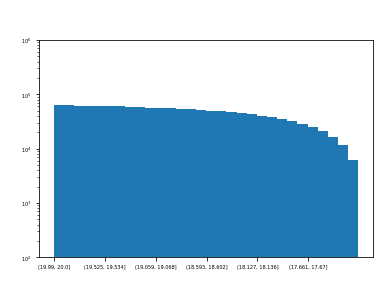

<Figure size 640x480 with 0 Axes>

In [30]:
##graph similar to the paper, culmulative
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
hist = ax.hist(bin_data,bins=30,cumulative =-1,log =True)
ax.set_xticks(ax.get_xticks()[::50])
ax.set_yticks(ax.get_yticks()[::1])
plt.xlabel('column density', fontsize=10)
plt.ylabel('cumulative number density in total of 1000 line of sights', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=5)
plt.figure(figsize=(8, 6), dpi=80)
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
plt.show()

In [25]:
##abserve the trend that as the column density decreases the rate of number density increase increase.
number_count = []
for i in range(1, len(hist[0])):
    number_count.append(hist[0][i]- hist[0][i-1])
number_count

[-476.0,
 -493.0,
 -527.0,
 -613.0,
 -665.0,
 -700.0,
 -803.0,
 -841.0,
 -967.0,
 -984.0,
 -1071.0,
 -1144.0,
 -1229.0,
 -1337.0,
 -1458.0,
 -1530.0,
 -1703.0,
 -1862.0,
 -2095.0,
 -2296.0,
 -2461.0,
 -2765.0,
 -2967.0,
 -3353.0,
 -3789.0,
 -3986.0,
 -4399.0,
 -4895.0,
 -5463.0]

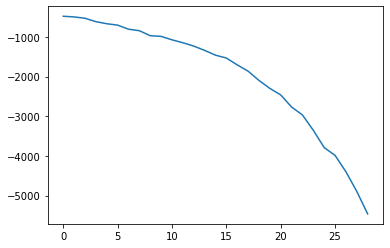

In [26]:
## this shows that lyman-limited series are concentrated at the less dense column density area 
plt.plot(number_count)

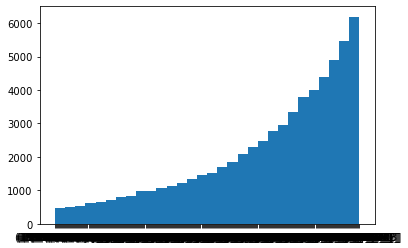

In [27]:
hist = plt.hist(bin_data,bins=30)

In [28]:
number_count = []
for i in range(1, len(hist[0])):
    number_count.append(hist[0][i]- hist[0][i-1])
number_count

[17.0,
 34.0,
 86.0,
 52.0,
 35.0,
 103.0,
 38.0,
 126.0,
 17.0,
 87.0,
 73.0,
 85.0,
 108.0,
 121.0,
 72.0,
 173.0,
 159.0,
 233.0,
 201.0,
 165.0,
 304.0,
 202.0,
 386.0,
 436.0,
 197.0,
 413.0,
 496.0,
 568.0,
 729.0]

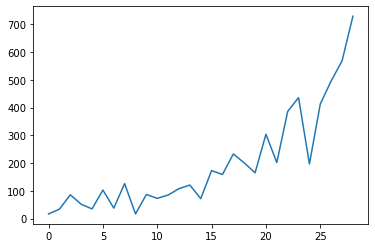

In [29]:
## below shows the rate of change at every bin from upper bound to lower bound
plt.plot(number_count)

We will now bin the data by sampling: